# Clean Energy Tweets Analysis

## Biomass 

Tweets on the topic of biomass clean energy are extracted and analyzed for their characteristics including counts, retwitts and likes to extract public opinion on this form of clean energy. 

In [23]:
# Based off of this code: https://betterprogramming.pub/how-to-scrape-tweets-with-snscrape-90124ed006af
import snscrape.modules.twitter as sntwitter
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
stopwords_set = stopwords.words("English")
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# https://medium.com/@b.terryjack/nlp-pre-trained-sentiment-analysis-1eb52a9d742c
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

import spacy

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ladan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [24]:
def tweet_extract (word_1, word_2, date_1, date_2):
    '''
    Extracting maximum 10000 tweets based on two topic words and a span of two dates 
    
    Parameters:
    -----------------------------
        word_1: string, topic word no 1
        word_2: string, topic word no 2
        date_1: string, start date with a string format 'yyyy-mm-dd'
        date_2: string, final date with a string format 'yyyy-mm-dd'
        
    Returns:
    -----------------------------
        a data frame with columns:
            Date     
            Tweet Id
            Text
            Username
            Location
            #Retweets
            #Replies
            #Likes
            #QuoteTweets
    '''
    tweets_list2 = []
    # Using TwitterSearchScraper to scrape data and append tweets to list
    # this is specifically looking for tweets with 'biomass', 'energy' between January 1, 2021 and March 31, 2021
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(word_1+ " " + word_2 + ' since:'+ date_1 + ' until:'+ date_2).get_items()):
        #only searching for 10000 tweets, but you can change this
        if i>10000:
            break
        #you'll get date, ID, content, username, location, num of retweets, likes, replies, and quote tweets
        tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.url, tweet.retweetCount, tweet.replyCount, tweet.likeCount, tweet.quoteCount])
        
    tweets_df2 = pd.DataFrame(tweets_list2, columns=['Date', 'Tweet Id', 'Text', 'Username', 'Location', '#Retweets', '#Replies', '#Likes', '#QuoteTweets'])    
    print(f"Total number of tweets are: {len(tweets_df2)}.")   
    return tweets_df2  

In [25]:
def ten_frequent_twitters(df):
    '''
    Ploting the users that tweets most among all users
    
    Parameters:
    -----------------------------
        df: DataFrame that has two columns of Username and Text of the tweets
        
    Returns:
    -----------------------------
        a graph that shows the ten user's that has most number of tweets
    '''
    count_df = df_2017_2021.groupby('Username').count().sort_values('Text', ascending = False)[:10].reset_index()
    ax = sns.barplot(x='Username', y='Date', data=count_df,
                 palette="Blues_d")
    ax.set_xlabel("Username", fontsize = 20)
    ax.set_ylabel("Count", fontsize = 20)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
    return

In [26]:
def tweets_words_list (df):
    '''
    Extracting the tweets words
    
    Parameters:
    -----------------------------
        df: DataFrame that has two columns of Username and Text of the tweets
        
    Returns:
    -----------------------------
        a list of the words of tweets
    '''
    tweets_words = []
    for i in range (len(df)):
        tweets_temp_words = []
        tweets_temp_words=((df.loc[i,'Text']).split())
        for word in tweets_temp_words:
            tweets_words.append(word)
    return tweets_words

In [27]:
def corpus_info(corpus):
    '''
    Extracting information about the tweets corpus
    
    Parameters:
    -----------------------------
        corpus : Tweets words list
        
    Returns:
    -----------------------------
        Prints information about the words in the corpus including:
            Vocabular size: the number of words used in the corpus,
            Most common words
            Most common words excluding stopwords
        Depicts the wordcloud of the corpus words    
    '''
    counter = Counter(word.lower() for word in corpus)
    print("Vocabulary size:", len(counter))
    print("Most common words:", " ".join([pair[0] for pair in counter.most_common(10)]))
    print("Most common words excluding stopwords:", " ".join([pair[0] for pair in counter.most_common(500) if pair[0].isalpha() and pair[0].lower() not in stopwords_set][:10]))
    print("Wordcloud:")
    stopwords_set.extend(["would", "could", "one", "may", "https","co", "CO", 'energy'])
    wordcloud = WordCloud(width=500,
                          height=330, 
                          stopwords = stopwords_set, 
                          background_color='white', 
                          colormap='RdYlGn').generate(" ".join(corpus))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()    

In [28]:
def tweet_analysis(word_1, word_2, date_1, date_2):
    '''
    Complete piplline of the tweets analysis
    
    Parameters:
    -----------------------------
        word_1: the first word in tweet
        word_2: the second word in tweet
        date_1: the first date of the tweet
        date_2: the second date of the tweet
        
    Returns:
    -----------------------------
        Prints information about the words in the corpus including:
            Vocabular size: the number of words used in the corpus,
            Most common words
            Most common words excluding stopwords
        Depicts the wordcloud of the corpus words,
        Depicts the users with the most number of tweets on the topic,
        Prints the tweet that has the most likes,
        Prints the tweet that has the most retweet numbers,
    '''
    
    tweets_list3 = []
    tweet_df2 = tweet_extract(word_1, word_2, date_1, date_2)
    my_corpus = tweets_words_list (tweet_df2)
    corpus_info(my_corpus)
    frequent_twitters(tweet_df2)
    df = tweet_df2[['Username','Text']].groupby(['Username'])['Text'].count().nlargest(50)
    user_id_1 = pd.DataFrame(df).reset_index()['Username'][0]
    user_id_2 = pd.DataFrame(df).reset_index()['Username'][1]
    user_id_3 = pd.DataFrame(df).reset_index()['Username'][2]
    print(f"{user_id_1},{user_id_2}, and {user_id_3} are the usernames with maximum number of tweets,respectively.")
    column_Retweets =tweet_df2["#Retweets"]
    max_index_retweets = column_Retweets.idxmax()
    print(f"The tweet: \n'{tweet_df2.iloc[max_index_retweets]['Text']}' \n by {tweet_df2.iloc[max_index_retweets]['Username']} got the maximum retweets of {tweet_df2.iloc[max_index_retweets]['#Retweets']} and {tweet_df2.iloc[max_index_retweets]['#Likes']} likes.")
    return tweet_df2

In [29]:
word_1 = 'biomass'
word_2 = 'energy'
date_1 =  '2017-01-01'
date_2 = '2021-08-01'

Total number of tweets are: 10001.
Vocabulary size: 43608
Most common words: energy biomass the to and of in is a for
Most common words excluding stopwords: energy biomass carbon renewable wood power solar trees new burning
Wordcloud:


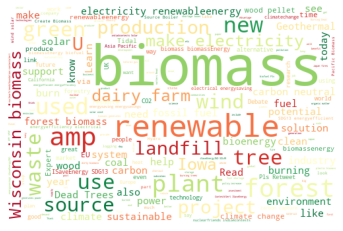

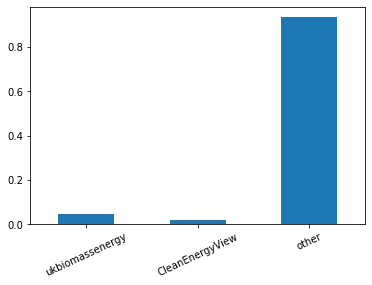

ukbiomassenergy,CleanEnergyView, and renugangTech are the usernames with maximum number of tweets,respectively.
The tweet: 
'WIN a bottle of our latest featured gin - Goodwill Gin!
@glenwyvis is a pioneer of sustainable distilling, using clean and renewable wind, hydro, solar and biomass energy.
Read about it at https://t.co/ZXAKF6VWJm and comment to enter!
Over 18s only. Winner drawn 20/2.
Good luck! https://t.co/qB2CXknhNg' 
 by scottish_gin got the maximum retweets of 412 and 467 likes.


In [30]:
df_2017_2021 = tweet_analysis(word_1, word_2, date_1, date_2)

In [31]:
count_df = df_2017_2021.groupby('Username').count().sort_values('Text', ascending = False)[:10].reset_index()

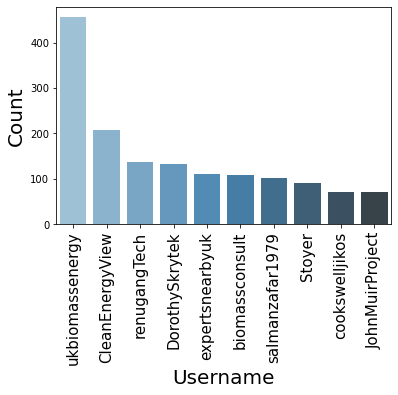

In [32]:
ax = sns.barplot(x='Username', y='Date', data=count_df,
                 palette="Blues_d")
ax.set_xlabel("Username", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);

In [33]:
text_string = ''
for i in range (len(df_2017_2021)):
    text_string += df_2017_2021.loc[i , 'Text']

In [34]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(text_string[:1000000])

name_entname_list = []

for ent in doc.ents:
    name_entname_list.append((ent.text, ent.label_))

In [35]:
gpe_names = []
for i in range(len(name_entname_list)):
    if name_entname_list[i][1] == 'GPE':
        gpe_names.append(name_entname_list[i][0])

Vocabulary size: 464
Most common words: uk california us biomass u.s. india china 🌳 canada hemp
Most common words excluding stopwords: uk california us biomass india china canada hemp netherlands pakistan
Wordcloud:


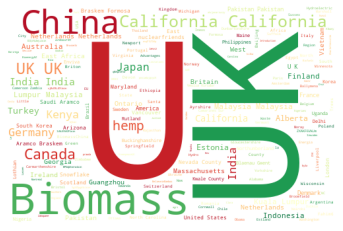

In [36]:
corpus_info(gpe_names)

In [37]:
name_entity_list = []
for i in range (len(name_entname_list)):
    name_entity_list.append(name_entname_list[i][0])

Vocabulary size: 5872
Most common words: # biomass energy 4 3 2 5 1 #biomass #biomass # #electrical #
Most common words excluding stopwords: uk biomass eu california today us first europe india hydro
Wordcloud:


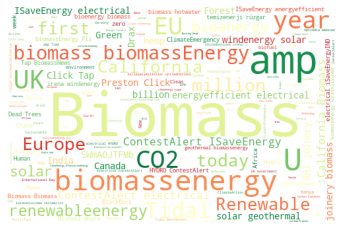

In [38]:
corpus_info(name_entity_list)